In [ ]:
import mss.tools

with mss.mss() as sct:
    # Get information of monitor 2
    monitor_number = 1
    mon = sct.monitors[monitor_number]

    # The screen part to capture
    monitor = {
        "top": mon["top"] ,  # 100px from the top
        "left": mon["left"] ,  # 100px from the left
        "width": mon['width'],
        "height": mon['height'],
        "mon": monitor_number,
    }
    output = "sct-mon{mon}_{top}x{left}_{width}x{height}.png".format(**monitor)

    # Grab the data
    sct_img = sct.grab(monitor)

    # Save to the picture file
    mss.tools.to_png(sct_img.rgb, sct_img.size, output=output)
    print(output)

In [ ]:
class Dog:

    # A simple class
    # attribute
    attr1 = "mammal"
    attr2 = "dog"

    # A sample method
    def __init__(self):
        self.attr1 = 'cat'
        print("I'm a", self.attr1)
        print("I'm a", self.attr2)


# Driver code
# Object instantiation
Rodger = Dog()

# Accessing class attributes
# and method through objects
print(Rodger.attr1)


In [ ]:
import window_capture
from window_capture import WindowCapture

wincap = WindowCapture()
op = wincap.get_screenshot()
type(op)

In [ ]:
print(op)

In [ ]:
import crop_cut
crop_cut.crop_the_map(r'crop_wts\best.pt',r'wincap.png')

In [ ]:
!pip3 install ultralytics==8.2.24

In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
model  = YOLO(r'crop_wts\best.pt')
results = model(r'images\wincap.png')

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes.xywh)
    if(np.size(boxes.xywh.squeeze(0).cpu().numpy())==4):
        x, y , w, h = boxes.xywh.squeeze(0).cpu().numpy()
        x_start = int(np.round_(x - (w/2)))
        y_start = int(np.round_(y - (h/2)))
        x_end = int(np.round_(x_start + w))
        y_end = int(np.round_(y_start + h))
        print(x,y,w,h)
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        obb = result.obb  # Oriented boxes object for OBB outputs
        result.show()  # display to screen
        result.save(filename='result.jpg')
        crop_img = cv2.imread('result.jpg')[y_start:y_end, x_start:x_end]
        
        cv2.imwrite('result_crop.jpg',crop_img)


image 1/1 c:\PyTorch\Test\images\wincap.png: 416x640 1 map-and-character, 12.0ms
Speed: 5.0ms preprocess, 12.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
tensor([[3260.9731,  541.7814,  344.1790,  328.3880]], device='cuda:0')
3260.9731 541.7814 344.17896 328.38797


In [ ]:
import math


def get_radian(degree:float)->float:
    return (math.pi/180)*degree

def get_degree(radian:float)->float:
    return (180*radian)/math.pi


get_degree(math.atan(1))

In [2]:
#crop single image map and save it in result_crop.jpg [this is for a single image]
from ultralytics import YOLO
import cv2
import numpy as np
import os
import glob
import torch

import time
#used to crop the map

def crop_the_map(model_wt:str, screenshot_path:str)->str:
    model  = YOLO(r'crop_wts\best.pt')
    results = model.predict(screenshot_path)

    for result in results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        print(boxes.xywh)
        if(np.size(boxes.xywh.squeeze(0).cpu().numpy())==4):
            x, y , w, h = boxes.xywh.squeeze(0).cpu().numpy()
            x_start = int(np.round_(x - (w/2)))
            y_start = int(np.round_(y - (h/2)))
            x_end = int(np.round_(x_start + w))
            y_end = int(np.round_(y_start + h))
            print(x,y,w,h)
            masks = result.masks  # Masks object for segmentation masks outputs
            keypoints = result.keypoints  # Keypoints object for pose outputs
            probs = result.probs  # Probs object for classification outputs
            obb = result.obb  # Oriented boxes object for OBB outputs
            #result.show()  # display to screen
            result.save(filename=r'images\result.jpg')
            crop_img = cv2.imread(r'images\result.jpg')[y_start:y_end, x_start:x_end]
            
            cv2.imwrite(r'images\result_crop.jpg',crop_img)
    return r'images\result_crop.jpg'

crop_the_map(r'crop_wts\best.pt', r'images\wincap.png')


image 1/1 c:\PyTorch\Test\images\wincap.png: 416x640 1 map-and-character, 13.5ms
Speed: 3.0ms preprocess, 13.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
tensor([[3260.9773,  541.7895,  344.1724,  328.3761]], device='cuda:0')
3260.9773 541.7895 344.17236 328.37607


C:\Users\pbn\AppData\Local\Temp\ipykernel_14612\741802796.py:37: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  crop_the_map(r'crop_wts\best.pt', r'images\wincap.png')


'images\\result_crop.jpg'

In [2]:
from PIL import Image
im = Image.open(r"images\1716886547.7197242.jpg")
im_resized = im.resize((640,640))
#im_resized.show()
from ultralytics import YOLO

model = YOLO(r'detection_wts\arrow.pt')
#model = YOLO(r'runs\pose\train16\weights\best.pt')

results = model(im_resized)
results[0].save('result.jpg')

var = results[0]

var.show()


0: 640x640 1 char, 7.4ms
Speed: 7.4ms preprocess, 7.4ms inference, 1284.6ms postprocess per image at shape (1, 3, 640, 640)


In [3]:
print(var.keypoints)

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9972, 0.9943]], device='cuda:0')
data: tensor([[[326.5023, 337.1977,   0.9972],
         [305.9098, 298.8799,   0.9943]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape: torch.Size([1, 2, 3])
xy: tensor([[[326.5023, 337.1977],
         [305.9098, 298.8799]]], device='cuda:0')
xyn: tensor([[[0.5102, 0.5269],
         [0.4780, 0.4670]]], device='cuda:0')


In [4]:
bottom_x,bottom_y = var.keypoints.xy.squeeze(0)[0].cpu().numpy()
top_x,top_y = var.keypoints.xy.squeeze(0)[1].cpu().numpy()

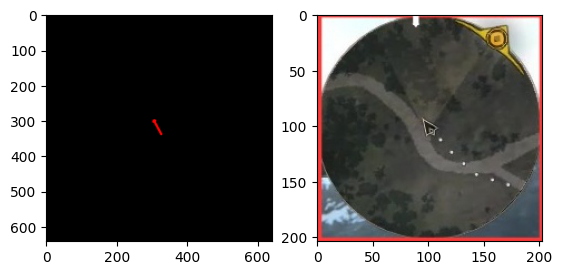

In [5]:
import numpy as np
import cv2
image = np.zeros((640, 640, 3), dtype=np.uint8)

# Define the start and end points
def round(x):
    return np.int_(x)

start_point = (round(bottom_x),round(bottom_y))
end_point = (round(top_x),round(top_y))

# Define the color (BGR format) and thickness
color = (255, 0, 0)  # Blue color
thickness = 5

# Draw the arrowed line
cv2.arrowedLine(image, start_point, end_point, color, thickness, tipLength=0.1)

# Display the image
from matplotlib import pyplot as plt
_, ax = plt.subplots(1,2)
ax[0].imshow(image)
ax[1].imshow(im)
plt.show()

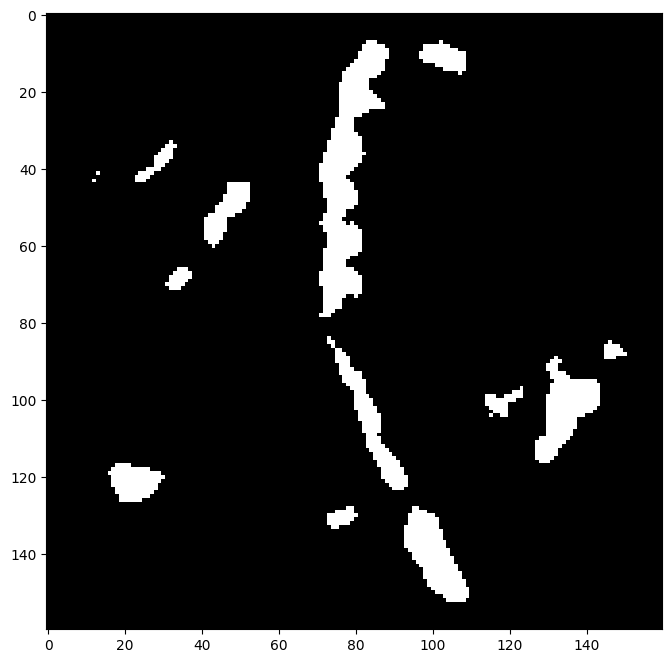

In [6]:
#segment path
#from utils import load_checkpoint
import torch
from UNET_model import UNET
import time
import glob
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
import torchvision
import cv2
model = UNET(in_channels=3, out_channels=1).to('cuda')
model.load_state_dict(torch.load(r'seg_wts\checkpoint.pt'))

model.eval()
path = r'r-segment-3\train\1715061376-883716_jpg.rf.0d22a99235cde3d74d7e446a183888f2.jpg'
#for name in glob.glob(path +  r'/*.jpg'):
img = cv2.imread(path)
img = cv2.resize(img, (160,160))

# Convert the image to a PyTorch tensor
transform = transforms.ToTensor()
tensor = transform(img)

# Add a batch dimension and convert the tensor to float
tensor = tensor.unsqueeze(dim=0).float()  # Convert to float here

# Ensure the tensor is on the same device as the model
# If your model is on GPU, you should also move the tensor to GPU
if torch.cuda.is_available():
    tensor = tensor.cuda()
    model = model.cuda()

# Perform inference
with torch.inference_mode():
    preds = torch.sigmoid(model(tensor))
    preds = (preds > 0.5).float()

    # Save the prediction image
    save_path = rf'saved_path/{time.time()}.jpg'
    torchvision.utils.save_image(preds, r'check.png')
    _, ax = plt.subplots(1,1,figsize=(8,8))
    
    plt.imshow(cv2.imread(r'check.png'))
    

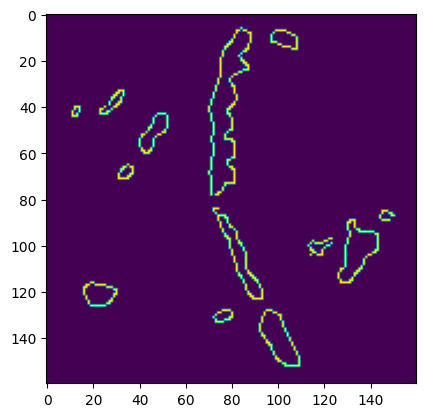

In [7]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
im = cv2.imread(r'check.png',0)
canny = cv2.Canny(im,100,200)
plt.imshow(canny)

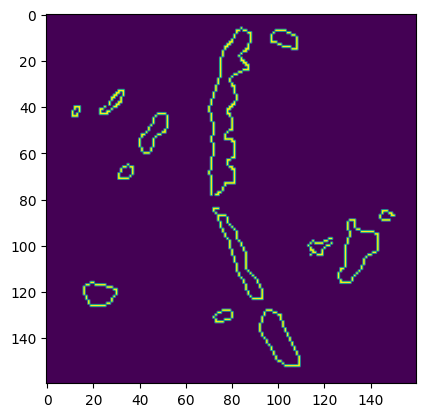

In [9]:
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
blank = np.zeros(im.shape, dtype='uint8')
cv2.drawContours(blank,contours,-1,(255,0,0),1)
plt.imshow(blank)

In [10]:
max_contours = sorted(contours, key=lambda c: cv2.arcLength(c, True), reverse=True)

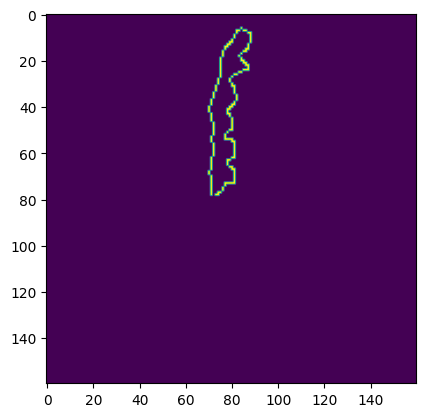

In [11]:
select, next_select  =  max_contours[0:2]
blank = np.zeros(im.shape, np.uint8)
cv2.fillPoly(blank, pts=select, color= (255,0,0))
#cv2.fillPoly(blank, pts=next_select, color= (255,0,0))
#cv2.drawContours(blank, [max_contours], 0, (255,0,0), 2)
cv2.imwrite(r'change_pixel.jpg',blank)
plt.imshow(blank)

In [6]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

im = Image.open(r'check.png')
img = np.array(im)
np.unique(img, axis=0)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 

In [1]:


from roboflow import Roboflow
rf = Roboflow(api_key="dkNF4vhNBxfa39Dinhx3")
project = rf.workspace("something-i42ep").project("r-segment")
version = project.version(3)
dataset = version.download("png-mask-semantic")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to r-segment-3 in png-mask-semantic:: 100%|██████████| 796/796 [00:00<00:00, 1967.80it/s]


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dkNF4vhNBxfa39Dinhx3")
project = rf.workspace("something-i42ep").project("r-segment")
version = project.version(3)
dataset = version.download("png-mask-semantic")


In [27]:
import math
from PIL import Image

dx = 100-10
dy = 5-10
ans  = math.degrees(math.atan2(dy, dx))
ans = ans if ans>=0 else ans + 360
ans

im = Image.open(r'images\segmented_path.png')
im.width, im.height

(160, 160)

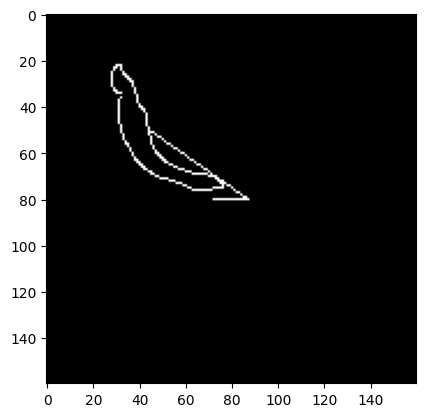

In [32]:
from matplotlib import pyplot as plt
plt.imshow(cv2.imread(r'images\slope_plot.png'))